# investigating titanic dataset
## Question investigated
#### 1.what factors made people more likely to survive?      
####     a. sex(who is more likely to survive male or female)
####     b. age ( can be ...who is more likely to survive children ,adult,older)
####     c. which class is more likely to survive?
#### 2. survival rate of passenger travelling with family and survival rate of passenger travelling alone
#### 3.finding correlation between different variables such as between age and survived
#### 4.how fare rate affected the survival 

##  Contains passenger information for passengerids 1-891:
######  PassengerId --> A unique identifier for the passenger 
######  Survived --> returns 1 if the passenger survived ,else return 0
###### Pclass --> Pclass is a proxy for socio-economic status (SES)
          1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower
###### Name 
###### Sex
###### Age
###### SibSp and Parch --> With respect to the family relation variables (i.e. sibsp and parch)
######                    some relations were ignored.  The following are the definitions used
######                  for sibsp and parch.
######
######                    Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
######                    Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
######                    Parent:   Mother or Father of Passenger Aboard Titanic
######                    Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic
###### Ticket -->  Ticket Number
###### Fare --> fare            Passenger Fare
###### Cabin 
###### Embarked --> embarked        Port of Embarkation
######            (C = Cherbourg; Q = Queenstown; S = Southampton) 

# 1.loading csv file

In [1]:
import pandas as pd
filename='C:/Users/Admin-pc/Downloads/titanic-data.csv'
dataset=pd.read_csv(filename)
#calculate total no of passenger
total_no_passenger=len(dataset)
print 'total no of passenger={}'.format(total_no_passenger)
dataset.head()


total no of passenger=891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
#to drop the row which have missing values
new_dataset = dataset.dropna()
new_dataset.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [3]:
#describe the dataset
dataset.describe()


C:\Users\Admin-pc\anaconda\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### from above we can depict many information about passenger such as
** maximum age of passenger is 80 and mean age is abot 30 year **

**maximum fare of ticket is 512 and minimum is o and average is 32 **


# 2.data wrangling phase

In [4]:
#calculate total no of missing values row
total_no_missing=total_no_passenger-len(new_dataset)
print 'total no of missing value={}'.format(total_no_missing)
percentage_of_missing_data= (total_no_missing*1.0/total_no_passenger*1.0)*100
print 'percentage of missing data={}'.format(percentage_of_missing_data)

total no of missing value=708
percentage of missing data=79.4612794613


## out 891 ,708 rows have missing value ,that is perecentage of missing value is 79%

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## mainly data missing is in cabin column ,out of 708 rows of missing value 687 missing value is alone from cabin column. but It is not going to affect the analysis much because this investigation has no dealing with cabin data .

# 2.1 data cleaning :-

###  2.1.a.Removing unwanted column


** removing unwanted column just increase the execution speed and save time **

In [6]:
dataset = dataset.drop(['Cabin','Name','Ticket','Embarked'], axis=1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


## 2.1.b dealing with missing age value

in order to fill the missing values in the dataset, i will use age mean to fill that missing value

In [7]:
#determine mean age based on sex  and pclass
mean_age = dataset.groupby(['Sex','Pclass'])['Age'].mean()

print mean_age

def remove_missing_age(row):
    if pd.isnull(row['Age']):
        return mean_age[row['Sex'],row['Pclass']]
    else:
        return row['Age']
dataset['Age']=dataset.apply(remove_missing_age,axis=1)


Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


### now dataset is ready for analysis process there are no missing values now because age missing values is filled with mean age

# 3. analysis phase and visualisation

In [9]:
#finding no of male passenger and female passenger
total_no_male=len(dataset[dataset['Sex']=='male'])
print 'Total no of men passenger={}'.format(total_no_male)
total_no_female=len(dataset[dataset['Sex']=='female'])
print 'Total no of female passenger={}'.format(total_no_female)
percent_male=(total_no_male*1.0/total_no_passenger)*100
percent_female=(total_no_female*1.0/total_no_passenger*1.0)*100
print 'percentage of male={}'.format(percent_male)
print 'percentage of female={}'.format(percent_female)



Total no of men passenger=577
Total no of female passenger=314
percentage of male=64.758698092
percentage of female=35.241301908


Populating the interactive namespace from numpy and matplotlib


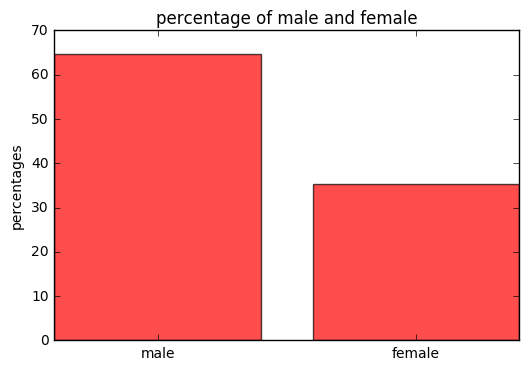

In [10]:
%pylab inline

import numpy as np
import matplotlib.pyplot as plt

object1=('male','female')

percentage=[percent_male,percent_female]

def plotbar(object1,percentage,ylabel,a,color_name,title_of_bar):
    y_pos=np.arange(len(object1))
    plt.bar(y_pos,percentage,align='center',alpha=a,color=color_name)
    plt.xticks(y_pos,object1)
    plt.ylabel(ylabel)
    plt.title(title_of_bar)
    plt.show()
plotbar(object1,percentage,'percentages',0.7,'r','percentage of male and female')

** percentage of male passenger is more compare to female **

In [11]:
#finding who survived
# finding total no of male who survived
total_no_male_survived=len(dataset[(dataset['Sex']=='male') & (dataset['Survived']==1)])
#finding total no of female who survived
total_no_female_survived=len(dataset[(dataset['Sex']=='female')&(dataset['Survived']==1)])
#total no of passenger survived 
total_no_passenger_survived=len(dataset[dataset['Survived']==1])

print 'total no of passenger survived={}'.format(total_no_passenger_survived)


print 'total no of male survived={}'.format(total_no_male_survived)
print 'total no of female survived={}'.format(total_no_female_survived)
#calculating percentage of male who survived   
percent_male_survived=(total_no_male_survived*1.0/total_no_male)*100
#calculating percentage of female who survived
percent_female_survived=(total_no_female_survived*1.0/total_no_female)*100
#calculatng percentage of passenger who survived
total_no_passenger=len(dataset)
percent_passenger_survived=(total_no_passenger_survived*1.0/total_no_passenger)*100

print 'percentege of passenger who survived={}'.format(percent_passenger_survived)
print 'percentage of male who survived={}'.format(percent_male_survived)
print 'percentage of female who survived={}'.format(percent_female_survived)

total no of passenger survived=342
total no of male survived=109
total no of female survived=233
percentege of passenger who survived=38.3838383838
percentage of male who survived=18.8908145581
percentage of female who survived=74.2038216561


Populating the interactive namespace from numpy and matplotlib


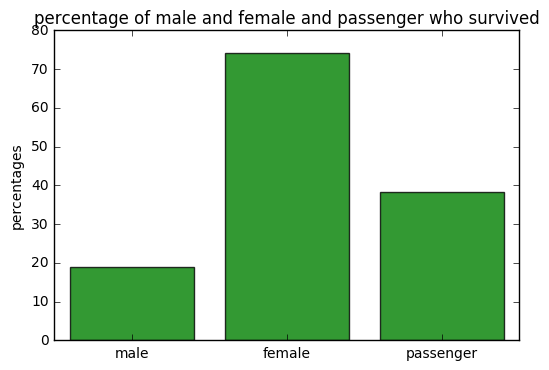

In [12]:
%pylab inline
object2=('male','female','passenger')
percentage2=[percent_male_survived,percent_female_survived,percent_passenger_survived]


plotbar(object2,percentage2,'percentages',0.8,'g','percentage of male and female and passenger who survived')

** percentage of female survival was more compare to male and overall survival rate **
#### offcourses male follow the rule women first means male given more chance to female for surviving 

## how age affect survival rate
#### child=(age=<18
#### adult=(age>18 & age<60)
#### senior citizen=(age>=60)

In [13]:
pd.DataFrame(dataset['Age']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
Age    891 non-null float64
dtypes: float64(1)
memory usage: 7.0 KB


## there is no missing value in the dataset so it can analysed easily

In [14]:
#survival rate of passenger with respect to their age
#child= age=<18
#adult=age>18 & age<60
#senior citizen=age>=60
#no of children in passenger list
no_child=len(dataset[dataset['Age']<=18])
#no of adult
no_adult=len(dataset[(dataset['Age']>18) & (dataset['Age']<60)])
#no of senior citizen
no_senior_citizen=len(dataset[dataset['Age']>=60])

print 'no of childen in passenger list={}'.format(no_child)
print 'no of adult in passenger list={}'.format(no_adult)
print 'no of senior citizen in passenger list={}'.format(no_senior_citizen)

no of childen in passenger list=139
no of adult in passenger list=726
no of senior citizen in passenger list=26


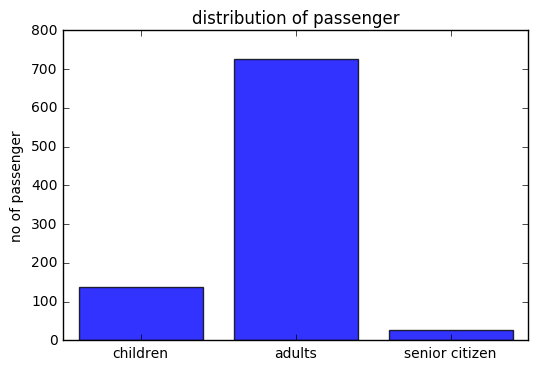

In [15]:
object3=('children','adults','senior citizen')
age=[no_child,no_adult,no_senior_citizen]
plotbar(object3,age,'no of passenger',0.8,'b','distribution of passenger')

** no of adult was more compare to children and senior citizen **

In [16]:
#find percentage of children,adult,senior citizen
percent_no_child=(no_child*1.0/total_no_passenger)*100
percent_no_adult=(no_adult*1.0/total_no_passenger)*100
percent_no_senior_citizen=(no_senior_citizen*1.0/total_no_passenger)*100

print 'percentage of children= {}'.format(percent_no_child)
print 'percentage of adult= {}'.format(percent_no_adult)
print 'percentage of senior citizen={}'.format(percent_no_senior_citizen)

percentage of children= 15.6004489338
percentage of adult= 81.4814814815
percentage of senior citizen=2.91806958474


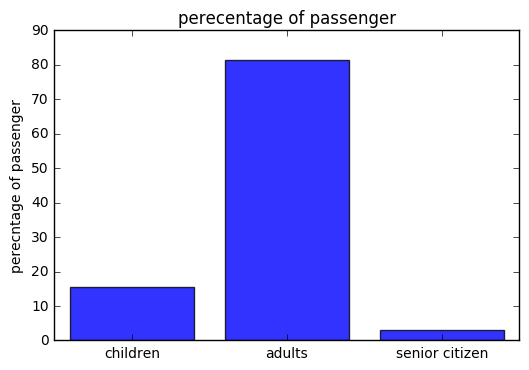

In [17]:
percentage3=[percent_no_child,percent_no_adult,percent_no_senior_citizen]
plotbar(object3,percentage3,'perecntage of passenger',0.8,'b','perecentage of passenger')

** percentage of adult was more compare to children and senior citizen **


In [18]:
#finding no of children survived
no_child_survived=len(dataset[(dataset['Age']<=18) & (dataset['Survived']==1)])

#finding no of adult survived
no_adult_survived=len(dataset[(dataset['Age']>18)&(dataset['Age']<60) & (dataset['Survived']==1)])

#finding no senior citizen servived
no_senior_citizen_survived=len(dataset[(dataset['Age']>=60) &(dataset['Survived']==1)])

print 'no of children survived={}'.format(no_child_survived)
print 'no of adults survived={}'.format(no_adult_survived)
print 'no of senior citizen survived={}'.format(no_senior_citizen_survived)

#percenatge of children survived
percent_child_survived=(no_child_survived*1.0/no_child)*100
#percentage of adult survived
percent_adult_survived=(no_adult_survived*1.0/no_adult)*100
#percentage of senior citizen
percent_senior_citizen_survived=(no_senior_citizen_survived*1.0/no_senior_citizen)*100

print 'percentage of children who survived={}'.format(percent_child_survived)
print 'percentage of adults who survived={}'.format(percent_adult_survived)
print 'percentage of senior citizen={}'.format(percent_senior_citizen_survived)




no of children survived=70
no of adults survived=265
no of senior citizen survived=7
percentage of children who survived=50.3597122302
percentage of adults who survived=36.5013774105
percentage of senior citizen=26.9230769231


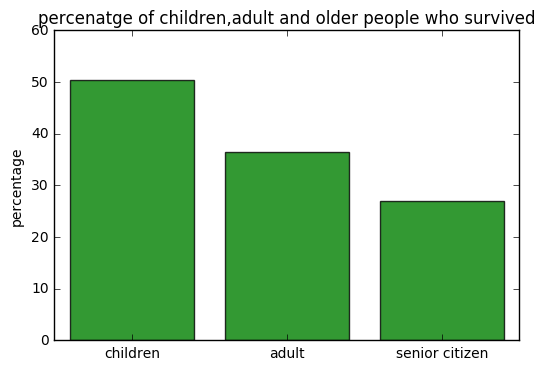

In [19]:
object4=('children','adult','senior citizen')

percentage4=[percent_child_survived,percent_adult_survived,percent_senior_citizen_survived]
plotbar(object4,percentage4,'percentage',0.8,'g','percenatge of children,adult and older people who survived')

## maximum passenger wanted children to abroaded first

** children survived more compare to adult and senior citizen **

** adult survived more compare to senior citizen **

In [20]:


dataset['age group']=pd.cut(dataset['Age'],bins=[0,10,20,30,40,50,60,70,80])
dataset.groupby(['age group'])[['Survived']].mean()











,Survived
age group,
"(0, 10]",0.593750
"(10, 20]",0.382609
"(20, 30]",0.326087
"(30, 40]",0.462428
"(40, 50]",0.355140
"(50, 60]",0.404762
"(60, 70]",0.235294
"(70, 80]",0.200000


age group of (0-10) survived more compare to others and age is negatively related to survived


In [21]:
def correlation(x,y):
    std_x=(x-x.mean())/x.std(ddof=0)
    std_y=(y-y.mean())/y.std(ddof=0)
    return (std_x*std_y).mean()
#finding correlation between age and survival
x=dataset['Age']
y=dataset['Survived']
print 'correlation between age and survived={}'.format(correlation(x,y))

    

correlation between age and survived=-0.0674849756853


The correlation coefficient ranges from −1 to 1. A value of 1 implies that a linear equation describes the relationship between X and Y perfectly, with all data points lying on a line for which Y increases as X increases. A value of −1 implies that all data points lie on a line for which Y decreases as X increases. A value of 0 implies that there is no linear correlation between the variables. 
The coefficient is negative, so the variables are inversely related, Therefore, values of age and survived lie on the opposite side of their means. So, This may mean that the correlation check indicates that lesser number of adults survived as compared to children

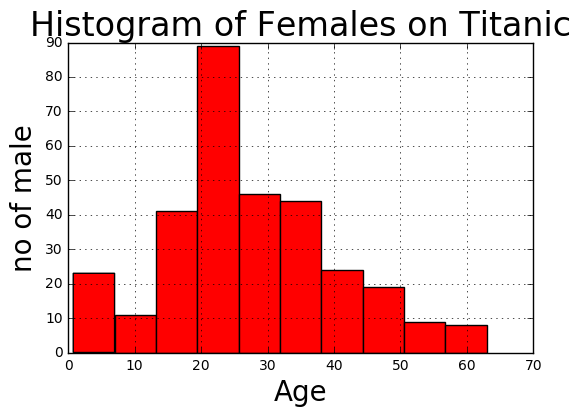

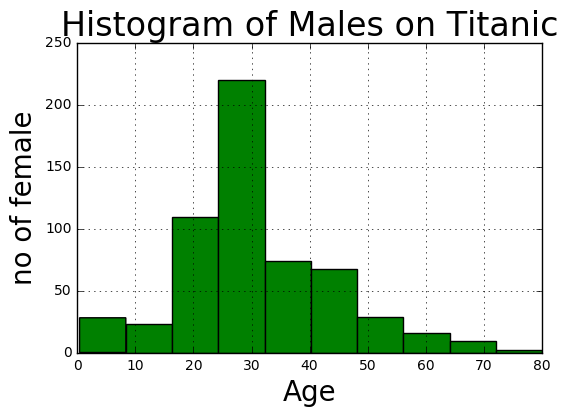

,Age
count,891.000000
mean,29.318643
std,13.281103
min,0.420000
25%,21.750000
50%,26.507589
75%,36.000000
max,80.000000


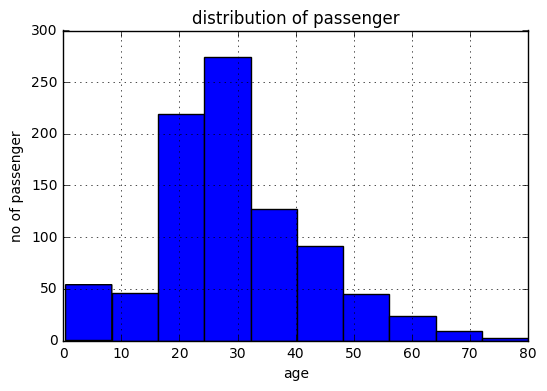

In [22]:




dataset[dataset['Sex']=='female']['Age'].hist(color='r')
plt.title('Histogram of Females on Titanic',fontsize=24)
plt.xlabel("Age",fontsize=20)
plt.ylabel("no of male",fontsize=20)
plt.show()

dataset[dataset['Sex']=='male']['Age'].hist(color='g')
plt.title('Histogram of Males on Titanic',fontsize=24)
plt.xlabel("Age",fontsize=20)
plt.ylabel("no of female",fontsize=20)
plt.show()

ax=dataset['Age'].hist()
ax.set_ylabel('no of passenger')
ax.set_xlabel('age')
ax.set_title('distribution of passenger')
pd.DataFrame(dataset['Age']).describe()

**  1.age of oldest passenger is 80 year. **


** no of passenger of age between 20 and 30 and between 30 and 40 are more compare to others. as we can say no of adult is more compare to children and older people**

## how passenger class affect the survival rate

In [23]:
#how passenger class affect survival rate
#finding no of people class wise
no_first_class=len(dataset[dataset['Pclass']==1])
no_second_class=len(dataset[dataset['Pclass']==2])
no_third_class=len(dataset[dataset['Pclass']==3])

print 'total no of passenger in first class={}'.format(no_first_class)
print  'total no of passenger in second class={}'.format(no_second_class)
print  'total no of passenger in third class={}'.format(no_third_class)

#finding no of passenger survived class wise

no_first_class_survived=len(dataset[(dataset['Pclass']==1) &(dataset['Survived']==1)])
no_second_class_survived=len(dataset[(dataset['Pclass']==2) &(dataset['Survived']==1)])
no_third_class_survived=len(dataset[(dataset['Pclass']==3) &(dataset['Survived']==1)])
print 'total no of passenger survived in first class={}'.format(no_first_class_survived)
print 'total no of passenger survived in second class={}'.format(no_second_class_survived)
print 'total no of passenger survived in third class={}'.format(no_third_class_survived)


#find no of passenger who didnot survived

no_first_class_not_survived=no_first_class-no_first_class_survived
no_second_class_not_survived=no_second_class-no_second_class_survived
no_third_class_not_survived=no_third_class-no_third_class_survived

print 'total no of passenger did not survived in first class={}'.format(no_first_class_not_survived)
print 'total no of passenger did not survived in second class={}'.format(no_second_class_not_survived)
print 'total no of passenger did not survived in third class ={}'.format(no_third_class_not_survived)

#find percentage of survival
percent_first_class_survival= (no_first_class_survived*1.0/no_first_class)*100
percent_second_class_survival= (no_second_class_survived*1.0/no_second_class)*100
percent_third_class_survival= (no_third_class_survived*1.0/no_third_class)*100
 
print 'percentage of first class passenger who survived={}'.format(percent_first_class_survival)
print 'percentage of second class passenger who survived={}'.format(percent_second_class_survival)
print 'percentage of third class passenger who survived={}'.format(percent_third_class_survival)



total no of passenger in first class=216
total no of passenger in second class=184
total no of passenger in third class=491
total no of passenger survived in first class=136
total no of passenger survived in second class=87
total no of passenger survived in third class=119
total no of passenger did not survived in first class=80
total no of passenger did not survived in second class=97
total no of passenger did not survived in third class =372
percentage of first class passenger who survived=62.962962963
percentage of second class passenger who survived=47.2826086957
percentage of third class passenger who survived=24.2362525458


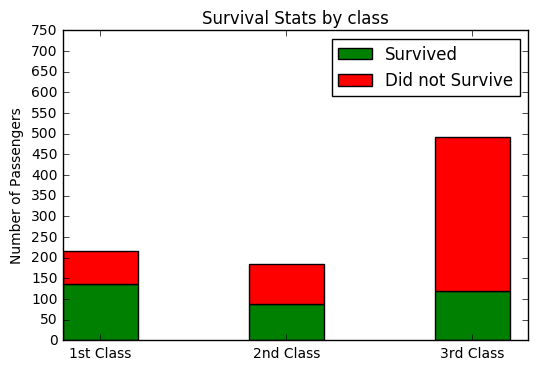

In [24]:
survived=(no_first_class_survived,no_second_class_survived,no_third_class_survived)
notsurvived=(no_first_class_not_survived,no_second_class_not_survived,no_third_class_not_survived)
index=np.arange(3)
width=0.4
p1 = plt.bar(index, survived,width ,color='g')
p2 = plt.bar(index, notsurvived,width, color='r',bottom=survived)
plt.ylabel('Number of Passengers')
plt.title('Survival Stats by class')
plt.xticks(index +width/2, ('1st Class', '2nd Class', '3rd Class'))
plt.yticks(np.arange(0, 800, 50))
plt.legend((p1, p2), ('Survived', 'Did not Survive'))

plt.show()


In pclass= 1 , no of survived passenger is more than no of passenger who did not survived.

 In pclass= 2,no of survived passenger is almost equal to no of passenger who did no survived.But in pclass=3 no of not survived is very more than who survived

In [25]:
#correlation between pclass and survival
pclass=dataset['Pclass']
print 'correlation between pclass and survival={}'.format(correlation(pclass,y))

correlation between pclass and survival=-0.338481035961


here correlation is negative it implies that survival rate will get as pclass increases from 1 to 3


In [34]:
#finding relation between sex,class and survival

#finding no of male in  first class
no_first_class_male=len(dataset[(dataset['Sex']=='male')&(dataset['Pclass']==1)])
#finding no of female in first class
no_first_class_female=len(dataset[(dataset['Sex']=='female')&(dataset['Pclass']==1)])
#finding no of male in first class who survived
no_first_class_male_survived=len(dataset[(dataset['Sex']=='male')&(dataset['Pclass']==1)&(dataset['Survived']==1)])

print 'number of male survived in first class={}'.format(no_first_class_male_survived)
#finding no of female survived in first class
no_first_class_female_survived=len(dataset[(dataset['Sex']=='female')&(dataset['Pclass']==1)&(dataset['Survived']==1)])

print 'number of female survived in first class={}'.format(no_first_class_female_survived)
#finding no of male in second class
no_second_class_male=len(dataset[(dataset['Sex']=='male')&(dataset['Pclass']==2)])
#finding no of female in second class
no_second_class_female=len(dataset[(dataset['Sex']=='female')&(dataset['Pclass']==2)])
#finding no of male survived in second class
no_second_class_male_survived=len(dataset[(dataset['Sex']=='male')&(dataset['Pclass']==2)&(dataset['Survived']==1)])

print 'number of male survived in second class={}'.format(no_second_class_male_survived)
#finding no of female survived in second class
no_second_class_female_survived=len(dataset[(dataset['Sex']=='female')&(dataset['Pclass']==2)&(dataset['Survived']==1)])

print 'number of female survived in second class={}'.format(no_second_class_female_survived)
#finding no of male in third class
no_third_class_male=len(dataset[(dataset['Sex']=='male')&(dataset['Pclass']==3)])
#finding no of female in third class
no_third_class_female=len(dataset[(dataset['Sex']=='female')&(dataset['Pclass']==3)])
#find no of male survived in third class
no_third_class_male_survived=len(dataset[(dataset['Sex']=='male')&(dataset['Pclass']==3)&(dataset['Survived']==1)])

print 'number of male surv in 3rd class={}'.format(no_third_class_male_survived)
#finding no of female survived in third class
no_third_class_female_survived=len(dataset[(dataset['Sex']=='female')&(dataset['Pclass']==3)&(dataset['Survived']==1)])

print 'number of feamle survived in 3rd class={}'.format(no_third_class_female_survived)

#finding percentage of male and female survival in different class
percent_male_survived_first_class=(no_first_class_male_survived*1.0/no_first_class_male)*100
percent_female_survived_first_class=(no_first_class_female_survived*1.0/no_first_class_female)*100

percent_male_survived_second_class=(no_second_class_male_survived*1.0/no_second_class_male)*100
percent_female_survived_second_class=(no_second_class_female_survived*1.0/no_second_class_female)*100

percent_male_survived_third_class=(no_third_class_male_survived*1.0/no_third_class_male)*100
percent_female_survived_third_class=(no_third_class_female_survived*1.0/no_third_class_female)*100

print 'percentage of male survived in first class={}'.format(percent_male_survived_first_class)
print 'percentage of female survived in first class={}'.format(percent_female_survived_first_class)
print 'percentage of male survived in second class={}'.format(percent_male_survived_second_class)
print 'percentage of female survived in second class={}'.format(percent_female_survived_second_class)
print 'percentage of male survived in third class={}'.format(percent_male_survived_third_class)
print 'percentage of female survived in third class={}'.format(percent_female_survived_third_class)







number of male survived in first class=45
number of female survived in first class=91
number of male survived in second class=17
number of female survived in second class=70
number of male surv in 3rd class=47
number of feamle survived in 3rd class=72
percentage of male survived in first class=36.8852459016
percentage of female survived in first class=96.8085106383
percentage of male survived in second class=15.7407407407
percentage of female survived in second class=92.1052631579
percentage of male survived in third class=13.5446685879
percentage of female survived in third class=50.0


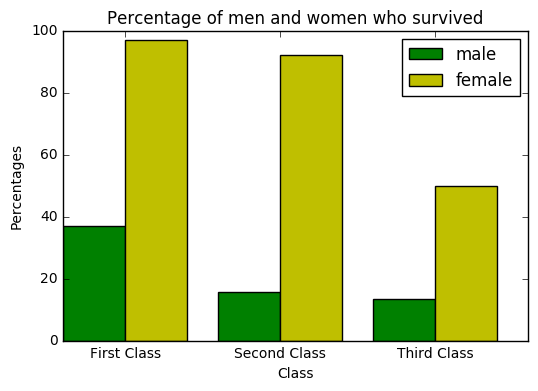

In [27]:
male_survived=(percent_male_survived_first_class,percent_male_survived_second_class,percent_male_survived_third_class)
female_survived=(percent_female_survived_first_class,percent_female_survived_second_class,percent_female_survived_third_class)
index=np.arange(3)
width=0.4
b1=plt.bar(index,male_survived,width,color='g',label='male')
b2=plt.bar(index+width,female_survived,width,color='y',label='female')
plt.xlabel('Class')
plt.ylabel('Percentages')
plt.title('Percentage of men and women who survived')
plt.xticks(index + width, ('First Class', 'Second Class', 'Third Class'))
plt.legend()

#plt.tight_layout()
plt.show()


** in first class approx 97% female survived compare to male and also overall no female survived more than male in every class
but perecentage of survival of female got reduced respectively with first class,second class and third class **


** male survived approx 37% in first class but this percentage reduced to 16 and 14 % respectively with second and third class ** 

## whose possibility is more to survive travelling with family or alone


In [28]:
#finding how survival rate is affected by traveling alone and with family
no_passenger_alone=len(dataset[(dataset['SibSp']==0) & (dataset['Parch']==0)])
no_passenger_family=len(dataset[(dataset['SibSp']>0) | (dataset['Parch']>0)])
no_passenger_alone_survived=len(dataset[(dataset['SibSp']==0) & (dataset['Parch']==0) &(dataset['Survived']==1)])
no_passenger_family_survived=len(dataset[((dataset['SibSp']>0) | (dataset['Parch']>0)) &(dataset['Survived']==1)])

#finding perecentage of passenger who survived travelling alone
percent_survived_alone=(no_passenger_alone_survived*1.0/no_passenger_alone)*100
percent_survived_family=(no_passenger_family_survived*1.0/no_passenger_family)*100

print 'total no of passenger travelling alone={}'.format(no_passenger_alone)
print 'total no of passenger travelling with family={}'.format(no_passenger_family)

print 'total no of passenger survived travelling alone={}'.format(no_passenger_alone_survived)
print 'total no of passenger survived travelling with parent'.format(no_passenger_family_survived)

print 'percentage of passenger survived travelling alone={}'.format(percent_survived_alone)
print 'percentage of passenger survived travelling with parent={}'.format(percent_survived_family)





total no of passenger travelling alone=537
total no of passenger travelling with family=354
total no of passenger survived travelling alone=163
total no of passenger survived travelling with parent
percentage of passenger survived travelling alone=30.3538175047
percentage of passenger survived travelling with parent=50.5649717514


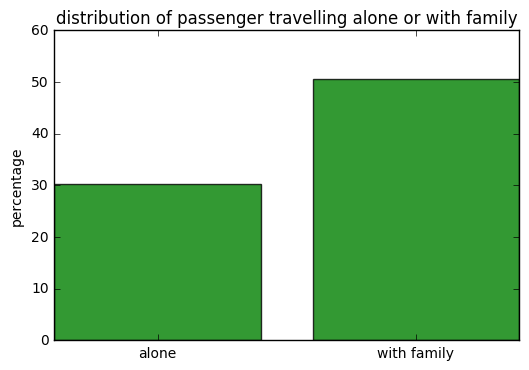

In [29]:
object5=('alone','with family')

percentage5=[percent_survived_alone,percent_survived_family]
plotbar(object5,percentage5,'percentage',0.8,'g','distribution of passenger travelling alone or with family')

** survival rate of passenger travelling alone is less than passenger travelling with family **

## how fare rate affected the survival
#### high fare = fare>50
#### average fare= 20<fare<=50
#### low fare=fare<=20


In [30]:
#finding no of people survived who ticket fare was greater 50
no_passenger_high_fare=len(dataset[dataset['Fare']>50])
no_passenger_average_fare=len(dataset[(dataset['Fare']<=50) &(dataset['Fare']>20)])
no_passenger_low_fare=len(dataset[dataset['Fare']<=20])

print 'no of passenger with high fare={}'.format(no_passenger_high_fare)
print 'no of passenger with average fare={}'.format(no_passenger_average_fare)
print 'no of passenger with low fare={}'.format(no_passenger_low_fare)

no_passenger_hf_survived=len(dataset[(dataset['Fare']>50) &(dataset['Survived']==1)])
no_passenger_af_survived=len(dataset[(dataset['Fare']<=50) &(dataset['Fare']>20)&(dataset['Survived']==1)])
no_passenger_lf_survived=len(dataset[(dataset['Fare']<=20)&(dataset['Survived']==1)])

print 'no of passenger survived with high fare={}'.format(no_passenger_hf_survived)
print 'no of passenger survived with average fare={}'.format(no_passenger_af_survived)
print 'no of passenger survived with low fare={}'.format(no_passenger_lf_survived)

percent_hf_survived=(no_passenger_hf_survived*1.0/no_passenger_high_fare)*100
percent_hf_not_survived=100-percent_hf_survived
percent_af_survived=(no_passenger_af_survived*1.0/no_passenger_average_fare)*100
percent_af_not_survived=100-percent_af_survived
percent_lf_survived=(no_passenger_lf_survived*1.0/no_passenger_low_fare)*100
percent_lf_not_survived=100-percent_lf_survived

print 'percentage of passenger survived with high ticket fare={}'.format(percent_hf_survived)
print 'percentage of passenger survived with average ticket fare={}'.format(percent_af_survived)
print 'percentage of passenger survived with low ticket fare={}'.format(percent_lf_survived)
print ' '
print 'percentage of passenger not survived with high ticket fare={}'.format(percent_hf_not_survived)
print 'percentage of passenger not survived with average ticket fare={}'.format(percent_af_not_survived)
print 'percentage of passenger not survived with low ticket fare={}'.format(percent_lf_not_survived)



no of passenger with high fare=160
no of passenger with average fare=216
no of passenger with low fare=515
no of passenger survived with high fare=109
no of passenger survived with average fare=90
no of passenger survived with low fare=143
percentage of passenger survived with high ticket fare=68.125
percentage of passenger survived with average ticket fare=41.6666666667
percentage of passenger survived with low ticket fare=27.7669902913
 
percentage of passenger not survived with high ticket fare=31.875
percentage of passenger not survived with average ticket fare=58.3333333333
percentage of passenger not survived with low ticket fare=72.2330097087


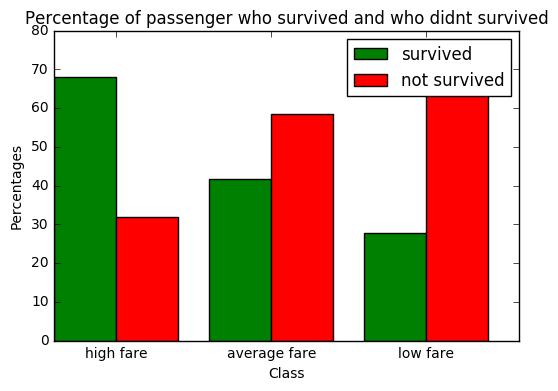

In [31]:
survived=(percent_hf_survived,percent_af_survived,percent_lf_survived)
not_survived=(percent_hf_not_survived,percent_af_not_survived,percent_lf_not_survived)
index=np.arange(3)
width=0.4
b1=plt.bar(index,survived,width,color='g',label='survived')
b2=plt.bar(index+width,not_survived,width,color='r',label='not survived')
plt.xlabel('Class')
plt.ylabel('Percentages')
plt.title('Percentage of passenger who survived and who didnt survived')
plt.xticks(index + width, ('high fare', 'average fare', 'low fare'))
plt.legend()


plt.show()

** survival rate of passenger with high fare is more than passenger with average and low fare .**
**  As above graph depicts that percent of survived is more than who did not survived in case of passenger with high fare**

** but in case of average fare percent of survived is less than who did not survived and it is same with low fare but here diiference is large. ** 
### no of passenger survived =( high fare>average fare >low fare) 


In [32]:
#correlation between fare and survive
f=dataset['Fare']

print 'correlation between fare and survive={}'.format(correlation(f,y))

correlation between fare and survive=0.257306522385


here correlation is positive.so more of passenger with high fare will survived. but its not the exact case that all passenger with high fare will survive

In [33]:
#mann whitney test u test
import scipy
import scipy.stats
def man_whitney_test(x):
    survive=dataset[dataset.Survived==1][x]
    not_survived=dataset[dataset.Survived==0][x]
    survive_mean=np.mean(survive)
    not_survive_mean=np.mean(not_survived)
    U,P=scipy.stats.mannwhitneyu(survive,not_survived)
    return survive_mean,not_survive_mean,U,P
man_whitney_test('Age')

(28.183708986925804, 30.025650613845645, 88948.0, 0.093277599318142945)

The Mann-Whitney U test is used to compare differences between two independent groups when the dependent variable is either ordinal or continuous, but not normally distributed.


p=0.0005


so null hyothesis that mean age of survival is equal to mean age of not survived is rejected.The mean age is of survival is less than mean age of not survived 

# 5.conclusion
#### 1.total 342 passenger survived out of 891,in that 109 male survived means only about 19% male survived and 233 female survived which is 74%. so female survived more compare to male
#### 2. children survived more compared to adult and adult survived more compare to older people
#### 3. passenger of first class survived more compare to second class and second class survived more compare to third class
####  4. passenger travelling with family survived more than passenger travelling alone
#### 5.survival rate is more whose ticket fare is high

## 5.a limitation of titanic dataset
** 1. there were 177 missing age value in the dataset :**
    I had a choice with how to handle the missing ages each with their pros and cons:
    
    
a.delete the rows with the missing ages - this would limit the accuracy of the analysis of the gender and class, however the accuracy of the analysis of the Age factor would be more accurate

b.fill missing  agev alue  with mean age value- this could skew the results of the age analysis.  I choose this option, however I based the ages on the average for the Gender and Class.

** 2.there were so many missing value in the dataset **


#### Refrence

1. <http://www.s-kape.com/posts/ucdand-p2>
2. <https://pythonspot.com/en/matplotlib-bar-chart/>
3. <https://github.com/aashika/P2-Investigate-a-dataset>
